In [1]:
require(readr)
require(dplyr)
require(ggplot2)

Loading required package: readr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2


In [2]:
svm.misclassied <- as.data.frame(read_tsv("../data/svm_genes_TPM.tsv.gz"))

Parsed with column specification:
cols(
  .default = col_double(),
  Sample = col_character(),
  her2_status_by_ihc = col_character(),
  SVM_classified = col_character()
)
See spec(...) for full column specifications.


In [3]:
her2.clinical <- as.data.frame(read_tsv("../data/her2_Clinical_Data.tsv"))

Warning message:
“Missing column names filled in: 'X1' [1], 'X2' [2], 'X3' [3]”Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


In [4]:
her2.clinical$X2 <- NULL
her2.clinical$X3 <- NULL
row.names(her2.clinical) <- her2.clinical$X1
her2.clinical$X1 <- NULL
#her2.clinical <- as.data.frame(t(her2.clinical))

In [5]:
her2.clinical <- as.data.frame(t(her2.clinical))
#her2.clinical

In [8]:
positive.fish <- her2.clinical[which(!is.na(her2.clinical$her2_fish_status) & her2.clinical$her2_fish_status != "[Not Available]" & her2.clinical$her2_fish_status != "[Not Evaluated]" & her2.clinical$her2_status_by_ihc == "Positive"), c('her2_status_by_ihc', 'her2_fish_status')]

In [10]:
negative.fish <- her2.clinical[which(!is.na(her2.clinical$her2_fish_status) & her2.clinical$her2_fish_status != "[Not Available]" & her2.clinical$her2_fish_status != "[Not Evaluated]" & her2.clinical$her2_status_by_ihc == "Negative"), c('her2_status_by_ihc', 'her2_fish_status')]

In [12]:
row.names(svm.misclassied) <- svm.misclassied$Sample
positive.fish$Sample <- row.names(positive.fish)

In [13]:
negative.fish$Sample <- row.names(negative.fish)

In [ ]:
arrange(merge(positive.fish, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_fish_status, SVM_classified)

In [15]:
rf.misclassied <- as.data.frame(read_tsv("../data/rf_genes_TPM.tsv.gz"))

rownames(rf.misclassied) <- rf.misclassied$Sample

Parsed with column specification:
cols(
  .default = col_double(),
  Sample = col_character(),
  her2_status_by_ihc = col_character(),
  RF_classified = col_character()
)
See spec(...) for full column specifications.


In [16]:
arrange(merge(positive.fish, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_fish_status, RF_classified)

ERROR: Error in arrange_impl(.data, dots): Evaluation error: object 'her2_ihc_percent_positive' not found.


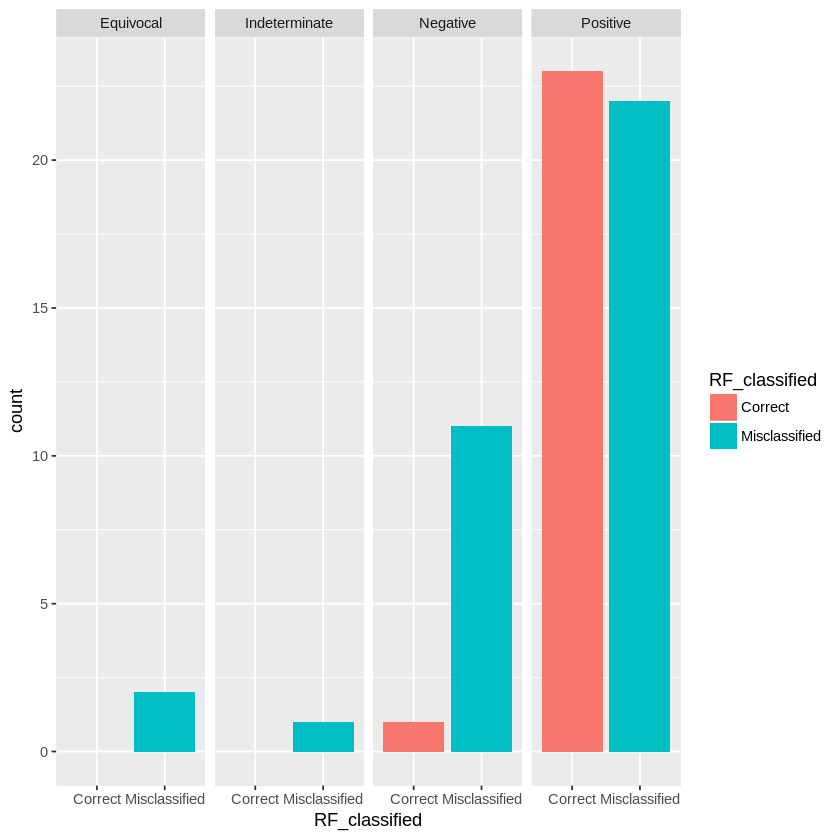

In [17]:
ghist <- ggplot(arrange(merge(positive.fish, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_fish_status, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_fish_status)

gghist

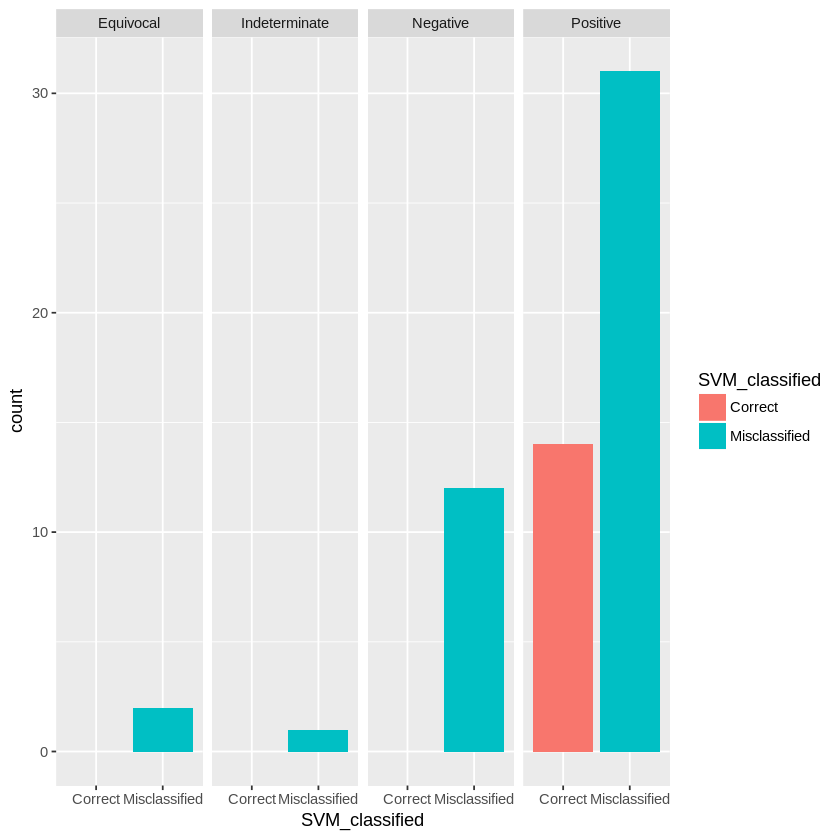

In [18]:
ghist <- ggplot(arrange(merge(positive.fish, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_fish_status, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_fish_status)

gghist

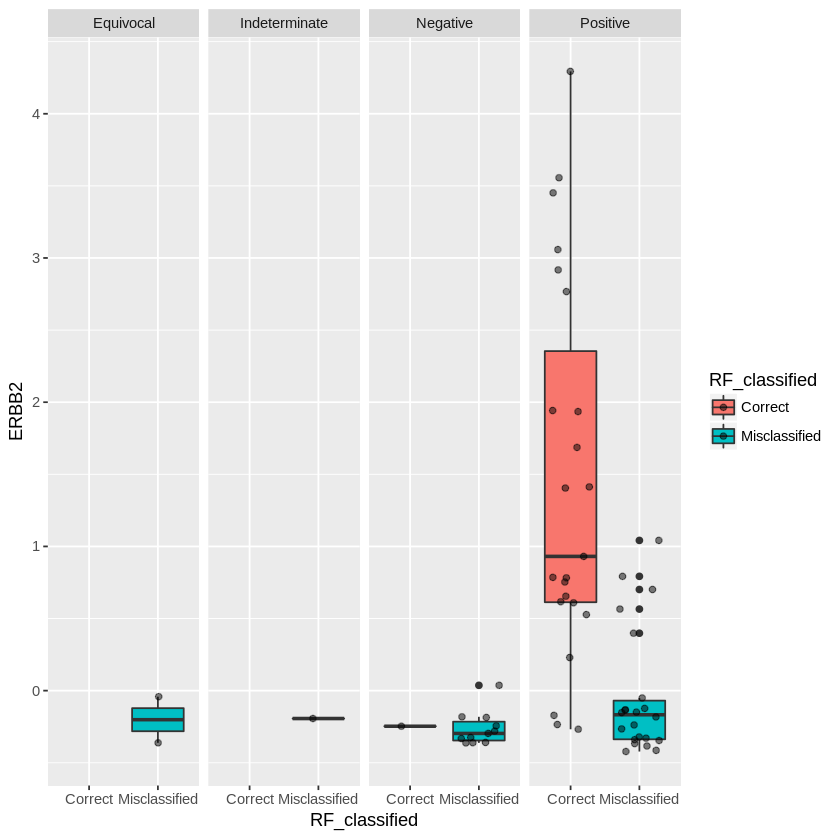

In [19]:
gbox <- ggplot(arrange(merge(positive.fish, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_fish_status, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_fish_status) + geom_jitter(width = .3, alpha = .5)

ggbox

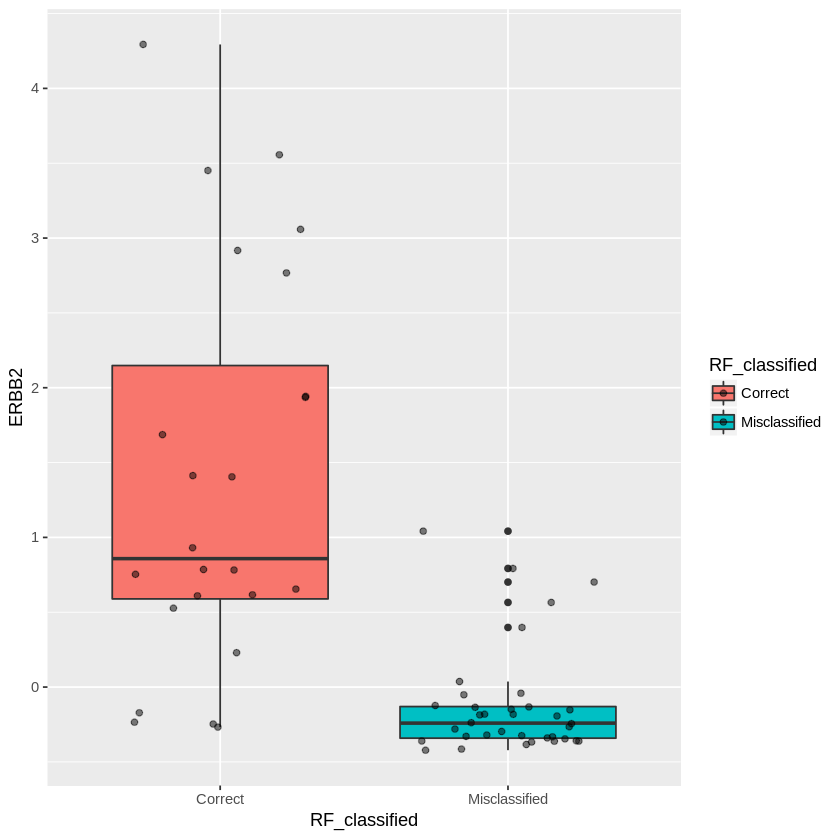

In [20]:
gbox <- ggplot(arrange(merge(positive.fish, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_fish_status, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

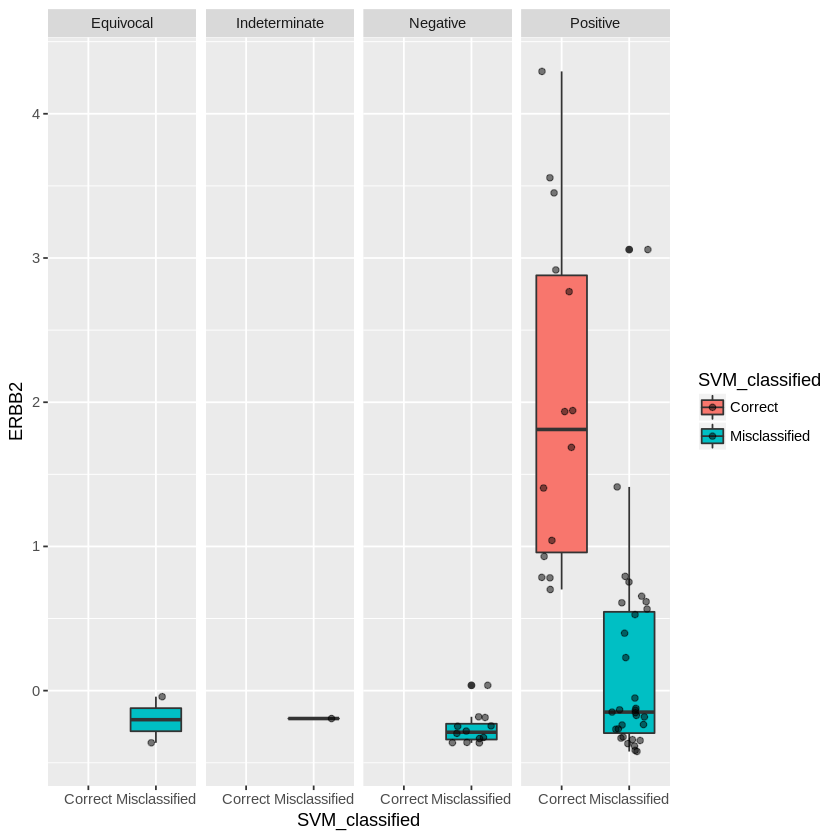

In [21]:
gbox <- ggplot(arrange(merge(positive.fish, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_fish_status, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_fish_status) + geom_jitter(width = .3, alpha = .5)

ggbox

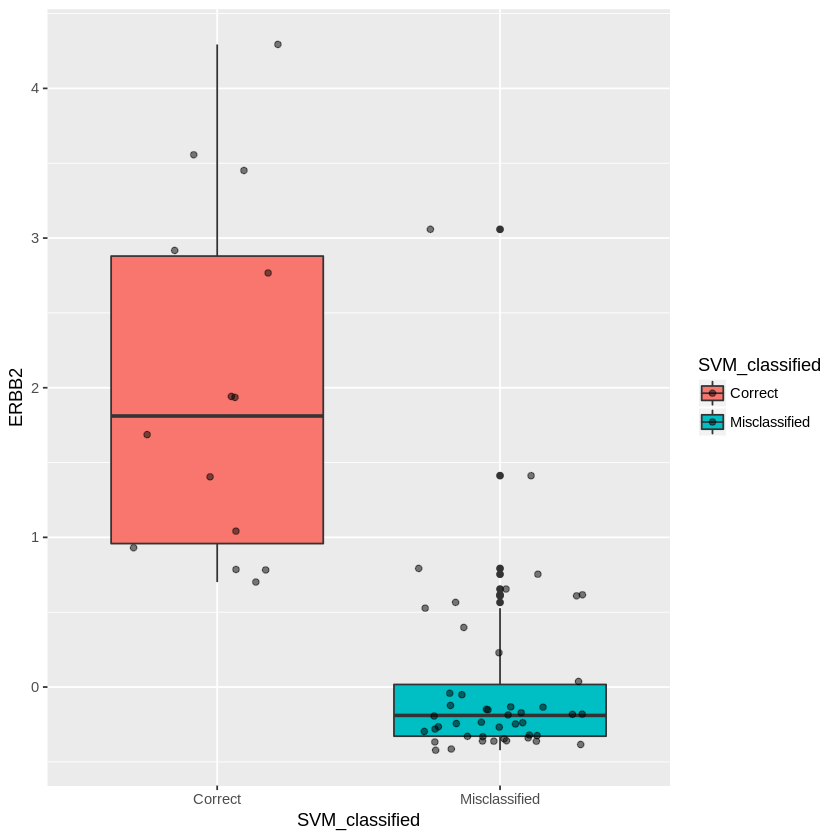

In [22]:
gbox <- ggplot(arrange(merge(positive.fish, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_fish_status, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

## Time to do the same to the negative samples

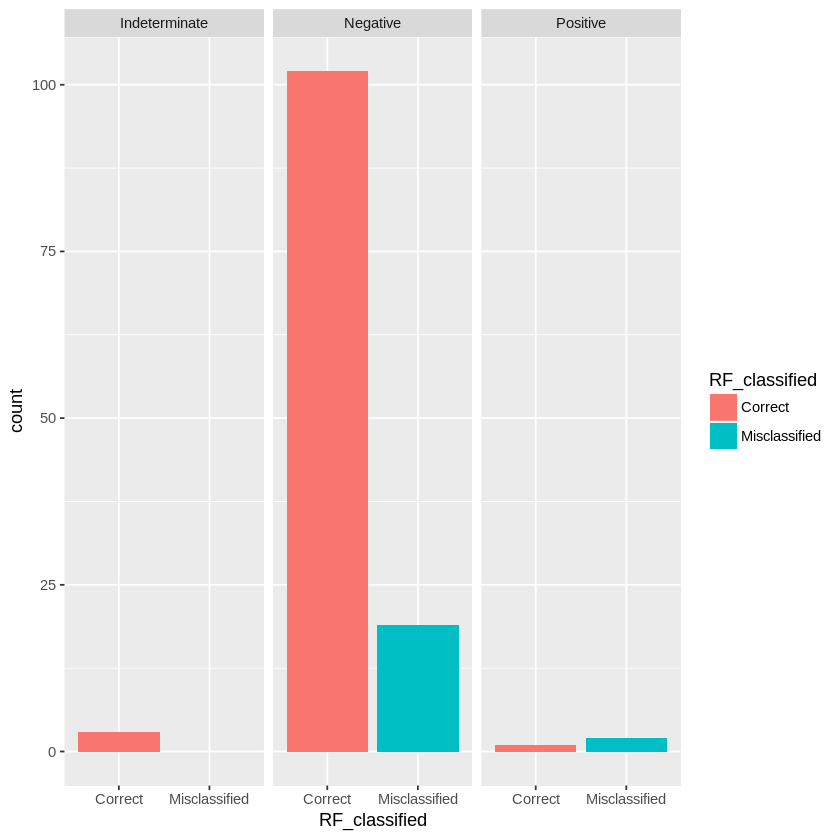

In [23]:
ghist <- ggplot(arrange(merge(negative.fish, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_fish_status, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_fish_status)

gghist

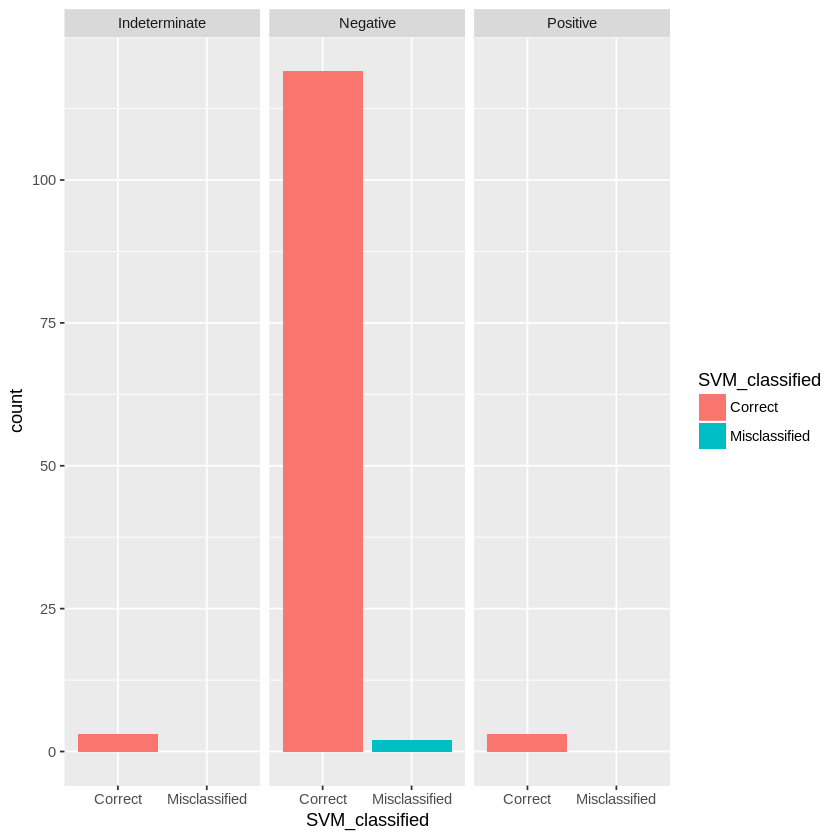

In [24]:
ghist <- ggplot(arrange(merge(negative.fish, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_fish_status, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_fish_status)

gghist

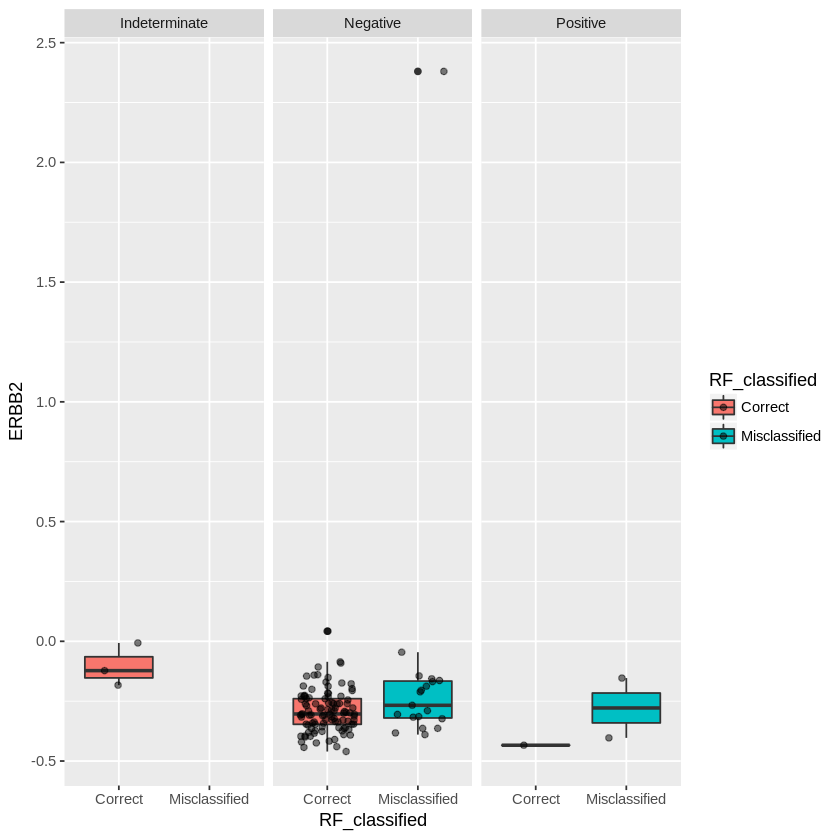

In [25]:
gbox <- ggplot(arrange(merge(negative.fish, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_fish_status, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_fish_status) + geom_jitter(width = .3, alpha = .5)

ggbox

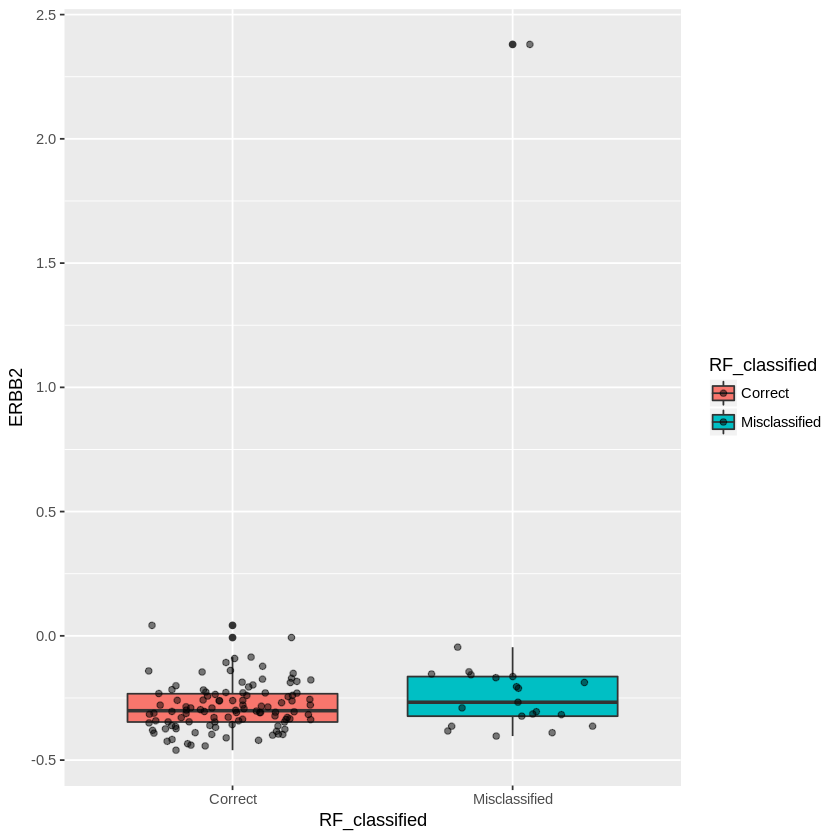

In [26]:
gbox <- ggplot(arrange(merge(negative.fish, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_fish_status, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

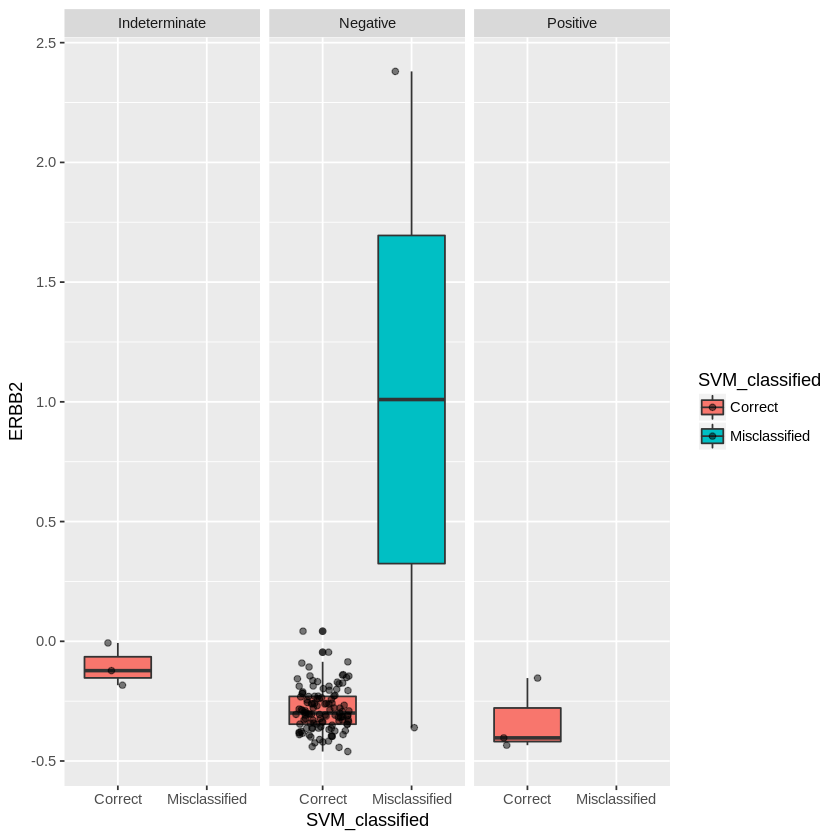

In [27]:
gbox <- ggplot(arrange(merge(negative.fish, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_fish_status, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_fish_status) + geom_jitter(width = .3, alpha = .5)

ggbox

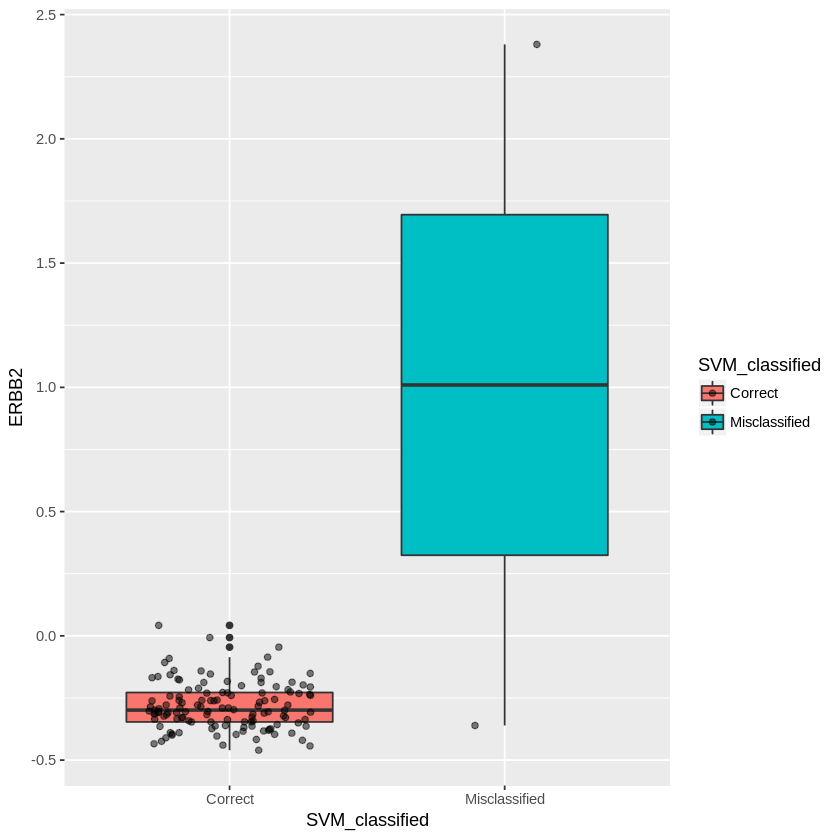

In [28]:
gbox <- ggplot(arrange(merge(negative.fish, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_fish_status, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

In [56]:
positive.copy <- her2.clinical[which(!is.na(her2.clinical$her2_copy_number) & her2.clinical$her2_status_by_ihc == "Positive"), c('her2_status_by_ihc', 'her2_copy_number')]

In [57]:
negative.copy <- her2.clinical[which(!is.na(her2.clinical$her2_copy_number) & her2.clinical$her2_status_by_ihc == "Negative"), c('her2_status_by_ihc', 'her2_copy_number')]

In [58]:
positive.copy$Sample <- row.names(positive.copy)

In [59]:
negative.copy$Sample <- row.names(negative.copy)

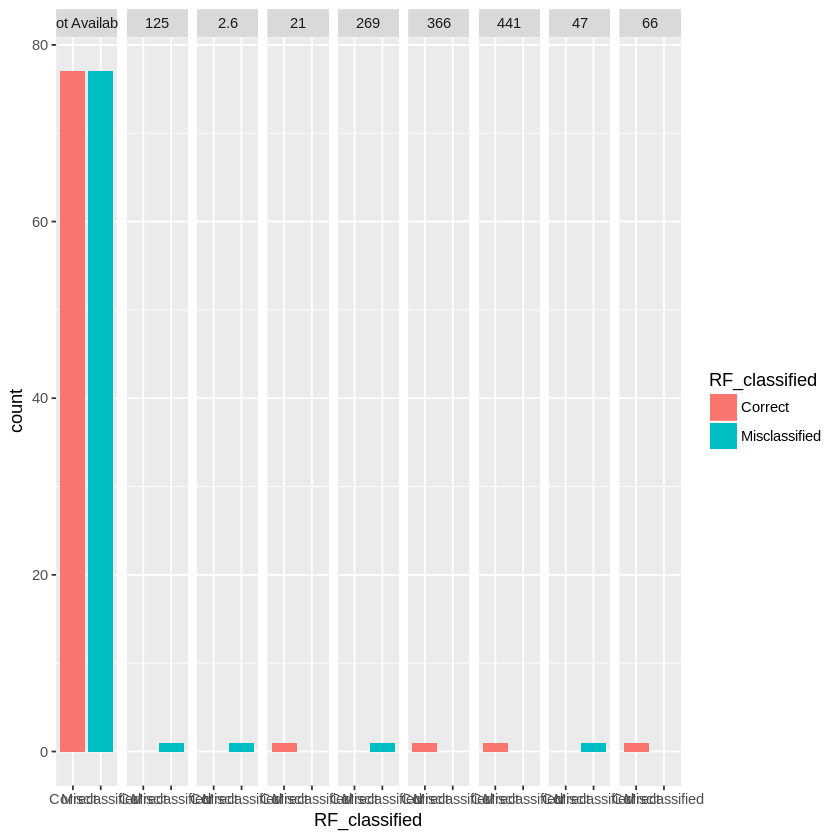

In [60]:
ghist <- ggplot(arrange(merge(positive.copy, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_copy_number, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_copy_number)

gghist

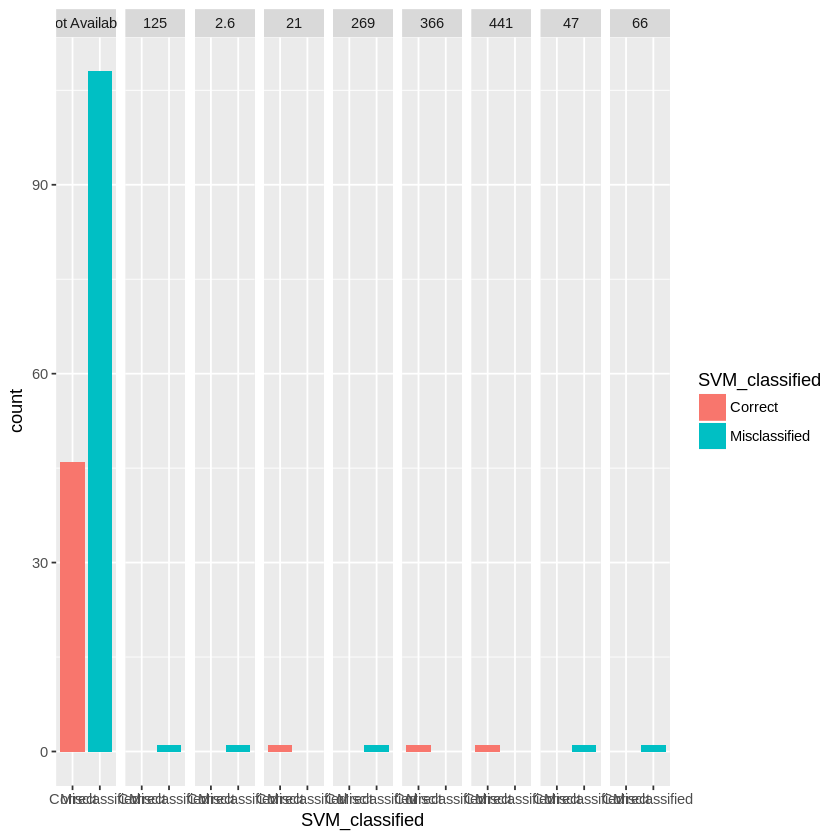

In [61]:
ghist <- ggplot(arrange(merge(positive.copy, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_copy_number, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_copy_number)

gghist

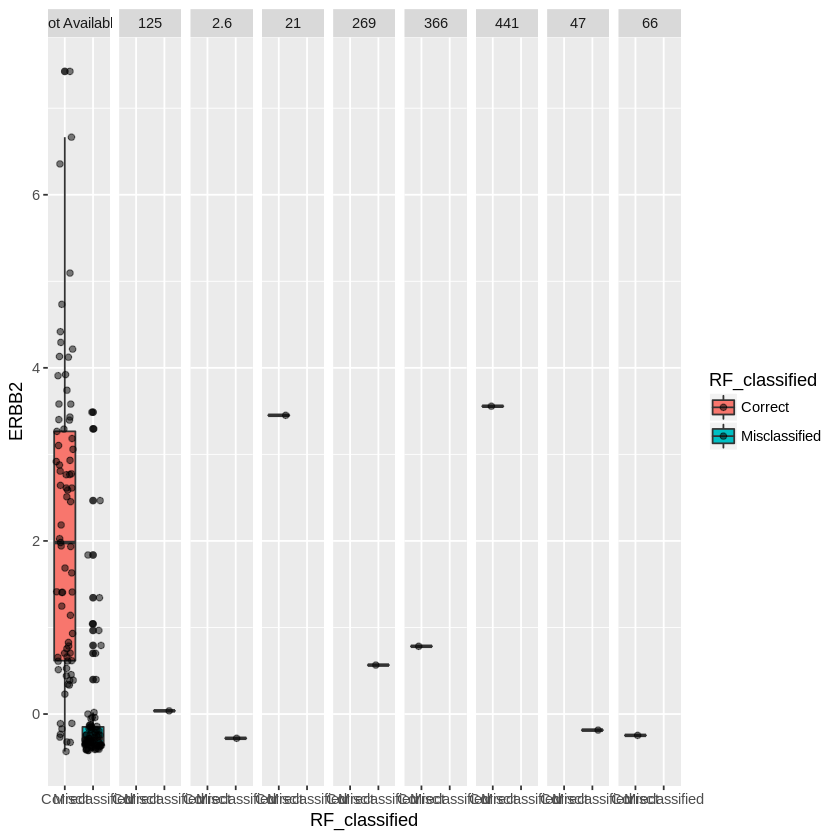

In [62]:
gbox <- ggplot(arrange(merge(positive.copy, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_copy_number, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_copy_number) + geom_jitter(width = .3, alpha = .5)

ggbox

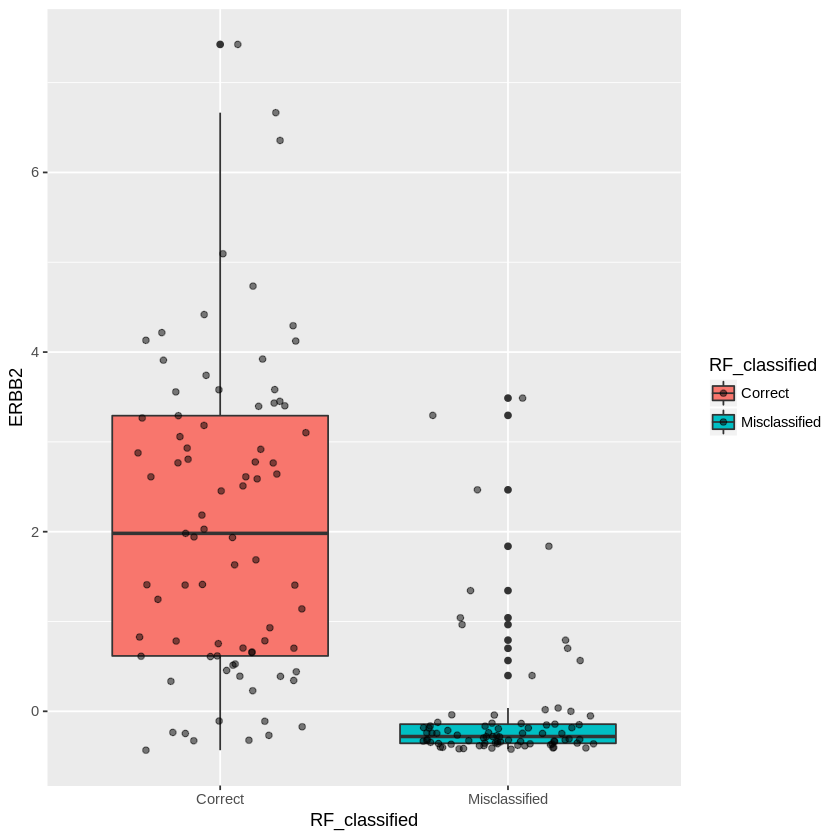

In [63]:
gbox <- ggplot(arrange(merge(positive.copy, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_copy_number, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

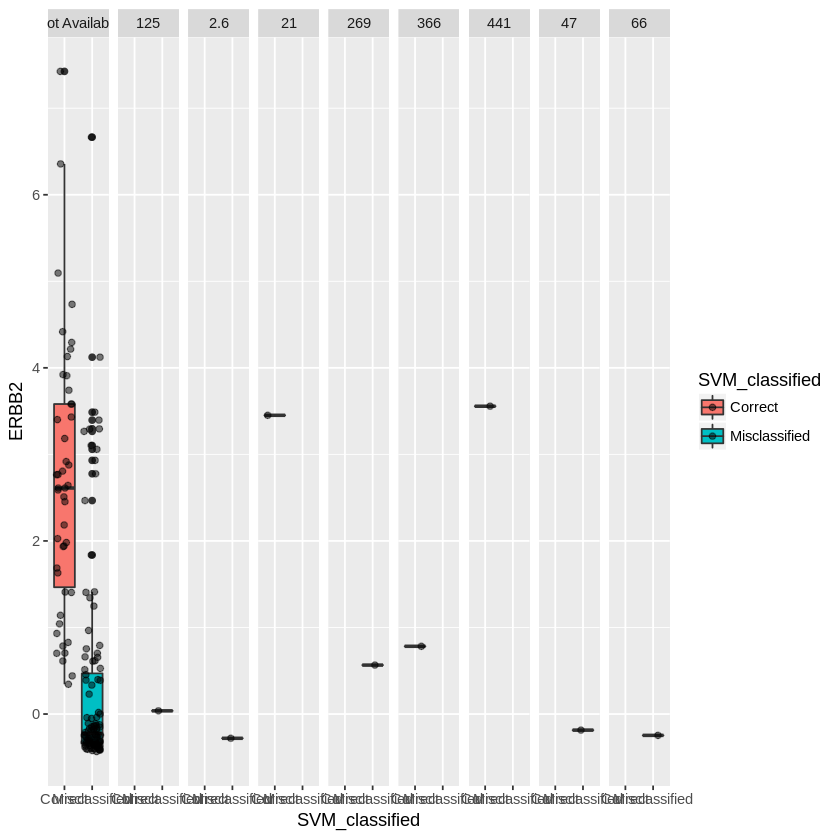

In [64]:
gbox <- ggplot(arrange(merge(positive.copy, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_copy_number, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_copy_number) + geom_jitter(width = .3, alpha = .5)

ggbox

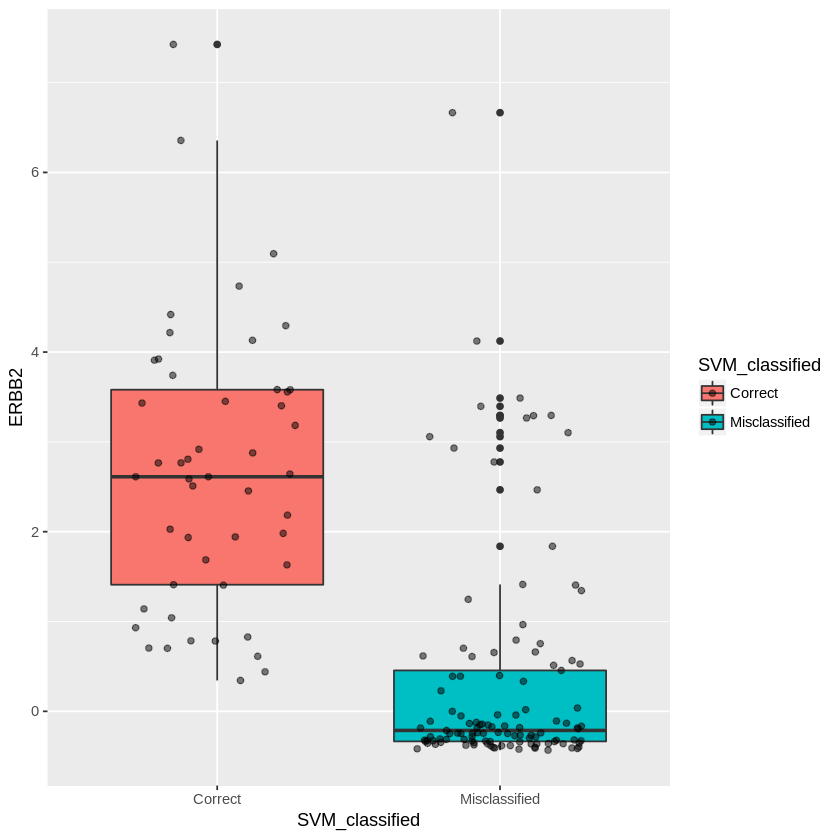

In [65]:
gbox <- ggplot(arrange(merge(positive.copy, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_copy_number, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

## Time to do the same to the negative samples

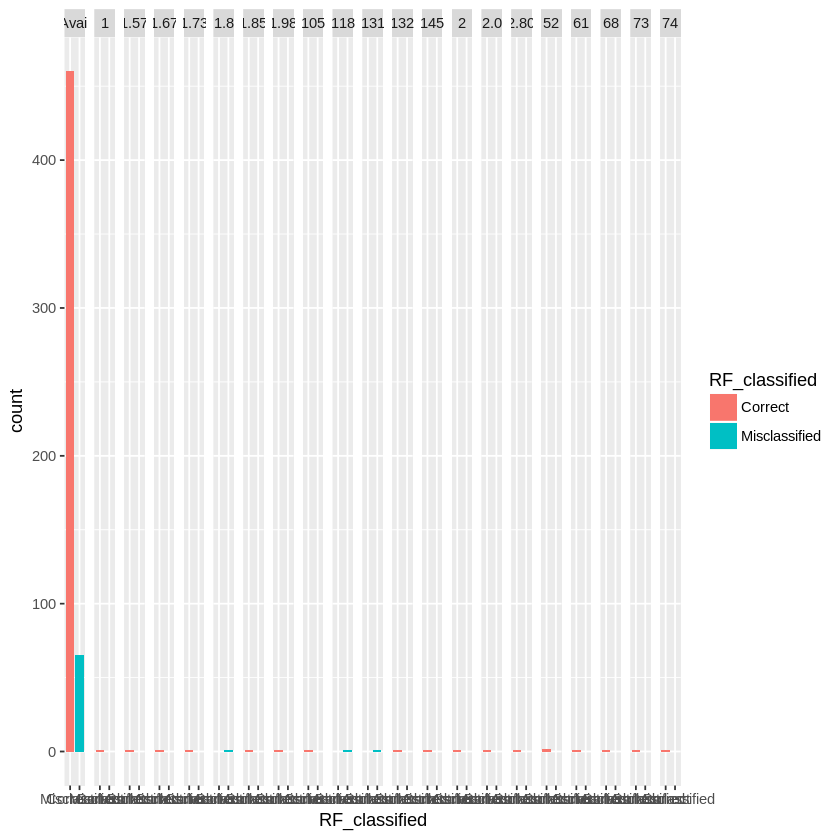

In [66]:
ghist <- ggplot(arrange(merge(negative.copy, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_copy_number, RF_classified),
               aes(x = RF_classified, fill = RF_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_copy_number)

gghist

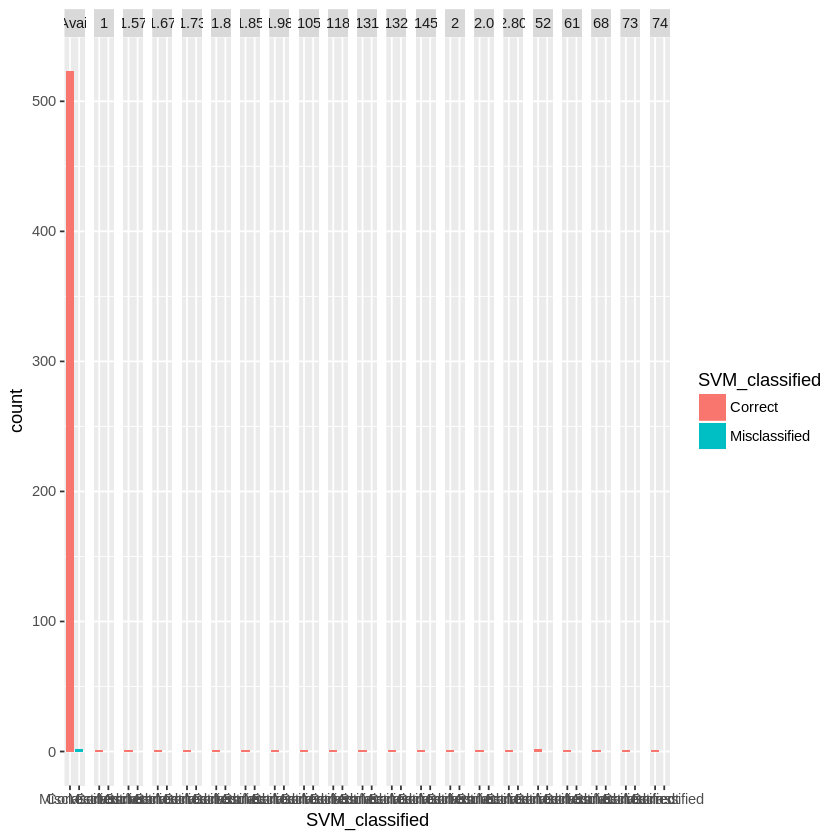

In [67]:
ghist <- ggplot(arrange(merge(negative.copy, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_copy_number, SVM_classified),
               aes(x = SVM_classified, fill = SVM_classified))

gghist <- ghist + geom_bar(stat = "count") + facet_grid( ~ her2_copy_number)

gghist

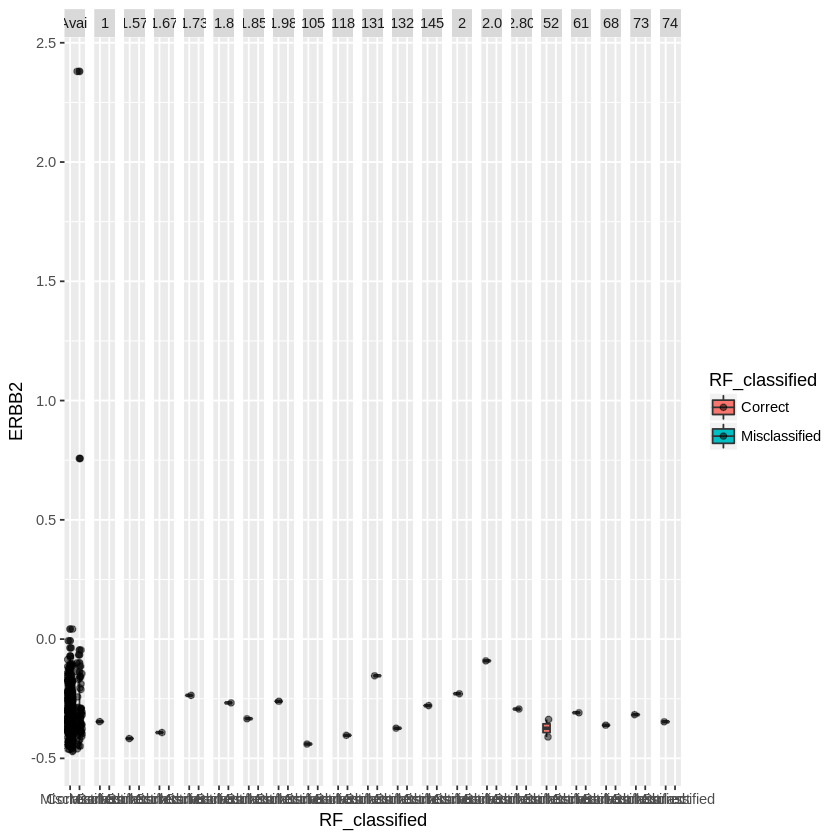

In [68]:
gbox <- ggplot(arrange(merge(negative.copy, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_copy_number, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_copy_number) + geom_jitter(width = .3, alpha = .5)

ggbox

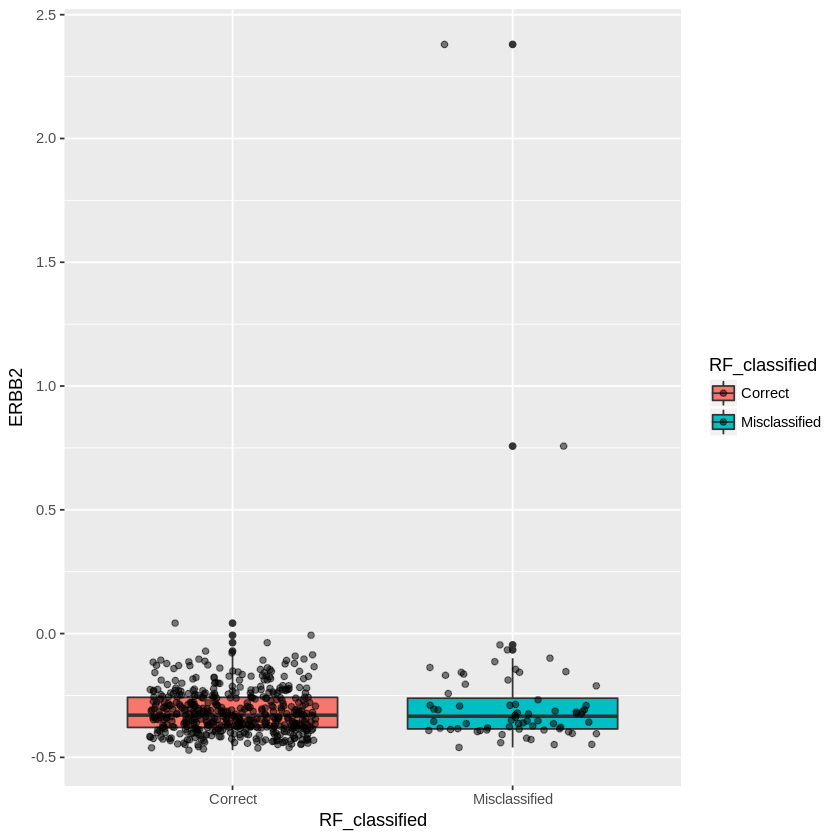

In [69]:
gbox <- ggplot(arrange(merge(negative.copy, rf.misclassied[, c('ERBB2','Sample', 'RF_classified')], by = 'Sample'), her2_copy_number, RF_classified),
               aes(x = RF_classified, y = ERBB2, fill = RF_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox

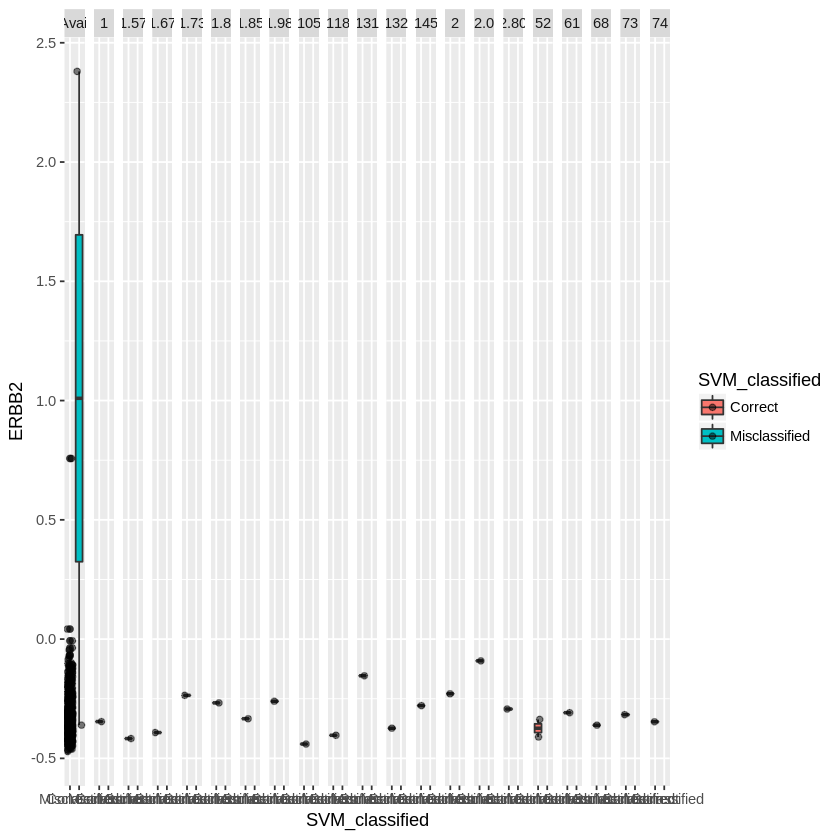

In [70]:
gbox <- ggplot(arrange(merge(negative.copy, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_copy_number, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + facet_grid( ~ her2_copy_number) + geom_jitter(width = .3, alpha = .5)

ggbox

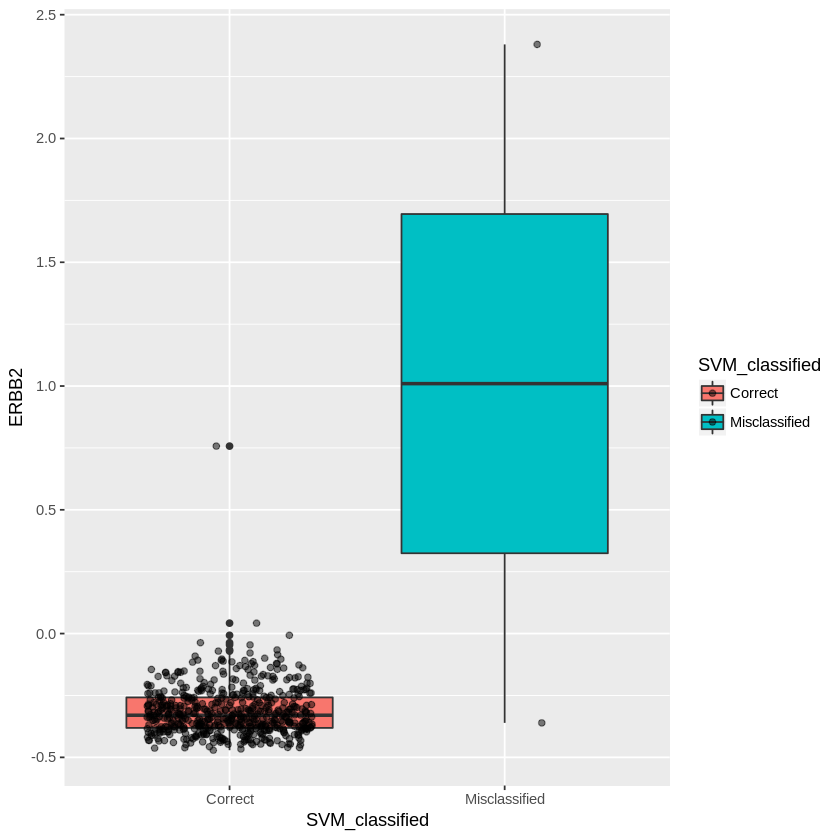

In [71]:
gbox <- ggplot(arrange(merge(negative.copy, svm.misclassied[, c('ERBB2','Sample', 'SVM_classified')], by = 'Sample'), her2_copy_number, SVM_classified),
               aes(x = SVM_classified, y = ERBB2, fill = SVM_classified))

ggbox <- gbox + geom_boxplot() + geom_jitter(width = .3, alpha = .5)

ggbox